In [1]:
#! pip install zernpy==0.0.15

#### Imports

In [2]:
from zernpy import ZernPol, ZernPSF, generate_phases_image
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#### Functions

In [3]:
def get_zernike_image(coefficients, amplitude, image_width, image_height):
    polynomial = ()
    for i,(m,n) in enumerate(coefficients):
        zp = ZernPol(m=m,n=n)
        polynomial += (zp,)
    zernike_image = generate_phases_image(polynomial, amplitude, image_width, image_height)
    return zernike_image
    

In [4]:
def get_phase_mask_aberration_mask(phase_mask,coefficients, amplitude):
    shape = phase_mask.shape
    mask1 = np.where(phase_mask !=0, 1, 0)
    indices = np.argwhere(mask1 == 1)
    y1,x1 = indices.min(axis=0)
    y2,x2 = indices.max(axis=0)
    image_width =x2-x1
    image_height =y2-y1
    zernike_image = get_zernike_image(coefficients, amplitude, image_width, image_height)
    mask_abr = np.zeros(shape)
    mask_abr[y1:y2, x1:x2] = zernike_image
    return mask_abr
   

#### Inputs

In [5]:
mask_path = r'C:\Users\97254\Desktop\git\DeepSTORM3D\Mat_Files\mask_tetrapod_printed.mat'

In [6]:
mask_dict = sio.loadmat(mask_path)
mask_name = list(mask_dict.keys())[3]
mask_init = mask_dict[mask_name]

In [9]:
mask_zp = get_phase_mask_aberration_mask(mask_init, [(-1,3),(1,3)], (0.3,0.3))

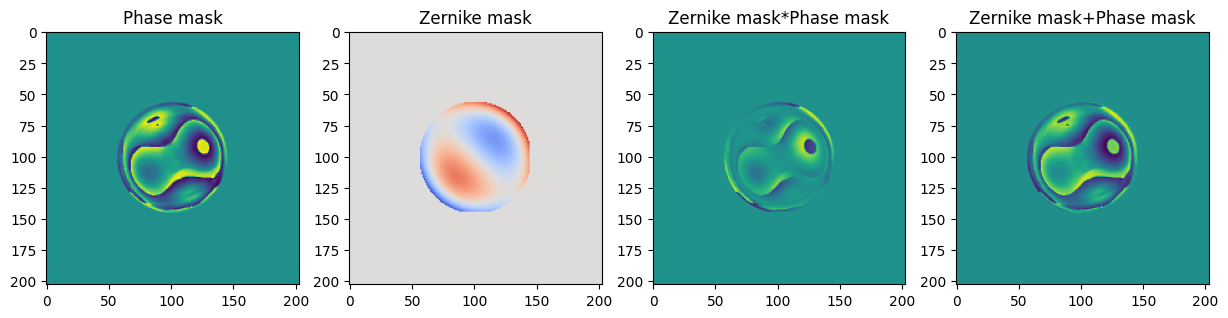

In [10]:
fig, ax = plt.subplots(1,4, figsize=(15,10))
ax[0].imshow(mask_init)
ax[0].set_title('Phase mask')
ax[1].imshow(mask_zp, cmap='coolwarm')
ax[1].set_title('Zernike mask')
ax[2].imshow(mask_zp*mask_init)
ax[2].set_title('Zernike mask*Phase mask')
ax[3].imshow(mask_zp+mask_init)
ax[3].set_title('Zernike mask+Phase mask')
plt.show()